In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# Loading the Data

In [2]:
# Loading the data
df = pd.read_csv("../data/final.csv")
df.drop(["Unnamed: 0", 'birth year', 'date', 'starttime', 'stoptime'], inplace=True, axis=1)
df.head()

,tripduration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,gender,month,day,hour,dayofweek,Isweekday,age,ages
0,574,359,E 47 St & Park Ave,40.755103,-73.974987,528,2 Ave & E 31 St,40.742909,-73.977061,33216,Subscriber,1,1,30,17,3,1,27,20s
1,709,493,W 45 St & 6 Ave,40.756800,-73.982912,3159,W 67 St & Broadway,40.774925,-73.982666,16092,Subscriber,1,1,23,19,3,1,30,20s
2,1993,503,E 20 St & Park Ave,40.738274,-73.987520,3709,W 15 St & 6 Ave,40.738046,-73.996430,34868,Subscriber,1,1,26,18,6,0,43,40s
3,392,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,438,St Marks Pl & 1 Ave,40.727791,-73.985649,31405,Subscriber,1,1,5,18,6,0,24,20s
4,543,3496,1 Ave & E 110 St,40.792327,-73.938300,3671,E 81 St & 2 Ave,40.774779,-73.954275,35695,Subscriber,1,1,23,15,3,1,22,20s


In [3]:
# Drop Irrelevant Data
df.drop(["start_station_name", "end_station_name", 'day', 'age'], axis=1, inplace=True)
df['usertype'] = df['usertype'].map({'Subscriber': 0, "Customer":1})
df.head()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,gender,month,hour,dayofweek,Isweekday,ages
0,574,359,40.755103,-73.974987,528,40.742909,-73.977061,33216,0,1,1,17,3,1,20s
1,709,493,40.756800,-73.982912,3159,40.774925,-73.982666,16092,0,1,1,19,3,1,20s
2,1993,503,40.738274,-73.987520,3709,40.738046,-73.996430,34868,0,1,1,18,6,0,40s
3,392,161,40.729170,-73.998102,438,40.727791,-73.985649,31405,0,1,1,18,6,0,20s
4,543,3496,40.792327,-73.938300,3671,40.774779,-73.954275,35695,0,1,1,15,3,1,20s


In [4]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature tripduration is: 8811
The number of values for feature start_station_id is: 926
The number of values for feature start_station_latitude is: 933
The number of values for feature start_station_longitude is: 933
The number of values for feature end_station_id is: 933
The number of values for feature end_station_latitude is: 940
The number of values for feature end_station_longitude is: 941
The number of values for feature bikeid is: 19404
The number of values for feature usertype is: 2 -- [0 1]
The number of values for feature gender is: 3 -- [0 1 2]
The number of values for feature month is: 12
The number of values for feature hour is: 24
The number of values for feature dayofweek is: 7 -- [1 2 3 4 5 6 7]
The number of values for feature Isweekday is: 2 -- [0 1]
The number of values for feature ages is: 6 -- ['10s' '20s' '30s' '40s' '50s' '60s']


In [5]:
df.dtypes

tripduration                 int64
start_station_id             int64
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                     int64
gender                       int64
month                        int64
hour                         int64
dayofweek                    int64
Isweekday                    int64
ages                        object
dtype: object

## Data Cleaning

In [6]:
# Making categorical variables into numeric representation
features = ['ages']
new_df = pd.get_dummies(df, columns = features)

print(df.shape)
# print the shape
print(new_df.shape)

# Visualizing the data
new_df.head()

(1027567, 15)
(1027567, 20)


,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,gender,month,hour,dayofweek,Isweekday,ages_10s,ages_20s,ages_30s,ages_40s,ages_50s,ages_60s
0,574,359,40.755103,-73.974987,528,40.742909,-73.977061,33216,0,1,1,17,3,1,0,1,0,0,0,0
1,709,493,40.756800,-73.982912,3159,40.774925,-73.982666,16092,0,1,1,19,3,1,0,1,0,0,0,0
2,1993,503,40.738274,-73.987520,3709,40.738046,-73.996430,34868,0,1,1,18,6,0,0,0,0,1,0,0
3,392,161,40.729170,-73.998102,438,40.727791,-73.985649,31405,0,1,1,18,6,0,0,1,0,0,0,0
4,543,3496,40.792327,-73.938300,3671,40.774779,-73.954275,35695,0,1,1,15,3,1,0,1,0,0,0,0


Notes:

We do not need to normalize / standardize the data in Logistic Regression due to the logistic function (0 or 1)


Once a value crosses the decision boundary (0.5 threshold), it saturates


After the 0.5 or before, there is no additional value to be added from smaller or larger values

## Feature Selection

In [7]:
# Split the data into X & y

#Predictor variable
X = new_df.drop('usertype', axis = 1).values
#Target variable
y = new_df['usertype']

print(X.shape)
print(y.shape)

(1027567, 19)
(1027567,)


In [8]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 50)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)

In [9]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_df.drop('usertype', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for tripduration is : 0.15186225002173218
The feature importance for start_station_id is : 0.054617779049888245
The feature importance for start_station_latitude is : 0.0593823331862351
The feature importance for start_station_longitude is : 0.060654330490784635
The feature importance for end_station_id is : 0.05407689417933717
The feature importance for end_station_latitude is : 0.060357300407495026
The feature importance for end_station_longitude is : 0.06141792847682258
The feature importance for bikeid is : 0.08434321343060874
The feature importance for gender is : 0.24345448828821686
The feature importance for month is : 0.03578882076631437
The feature importance for hour is : 0.04687942490646816
The feature importance for dayofweek is : 0.030847076778457105
The feature importance for Isweekday is : 0.002895647513480057
The feature importance for ages_10s is : 0.009948076403900481
The feature importance for ages_20s is : 0.015674600924995816
The feature impo

In [10]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

fi_df

,index,Feature,Feature Importance
0,8,gender,0.243454
1,0,tripduration,0.151862
2,7,bikeid,0.084343
3,6,end_station_longitude,0.061418
4,3,start_station_longitude,0.060654
5,5,end_station_latitude,0.060357
6,2,start_station_latitude,0.059382
7,1,start_station_id,0.054618
8,4,end_station_id,0.054077
9,10,hour,0.046879


# Splitting the Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(822053, 19)
(205514, 19)
(822053,)
(205514,)


# Logistic Regression

In [12]:
# Training my model
log_reg = LogisticRegression(class_weight = 'balanced', random_state=42, solver = 'liblinear')

log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [13]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_test)
y_pred = log_reg.predict(X_test)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

array([[0.000748, 0.000039, -0.018757, -0.009376, 0.000046, -0.025819,
        -0.020082, -0.000032, -0.845642, 0.079370, 0.021073, 0.017247,
        -0.833222, 1.008240, 0.490334, -0.299740, -0.638282, 0.735609,
        -1.296500]])

# Evaluating the Model

In [14]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_test, y_pred))

The Training Accuracy is:  0.7779413249510676
The Testing Accuracy is:  0.7777572330838775
              precision    recall  f1-score   support

           0       0.94      0.79      0.86    176736
           1       0.35      0.72      0.47     28778

    accuracy                           0.78    205514
   macro avg       0.65      0.75      0.67    205514
weighted avg       0.86      0.78      0.81    205514



In [15]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

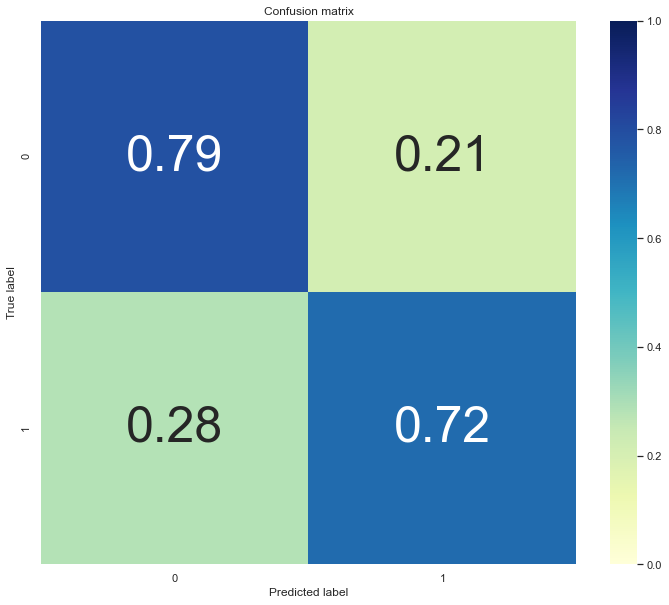

In [16]:
# Visualizing cm

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [17]:
log_reg.classes_

array([0, 1], dtype=int64)

In [18]:
cm.sum(axis=1)
cm_norm

array([[0.787581, 0.212419],
       [0.282577, 0.717423]])

In [19]:
cm

array([[139194,  37542],
       [  8132,  20646]], dtype=int64)

In [20]:
cm.sum(axis=0)

array([147326,  58188], dtype=int64)

In [21]:
np.diag(cm)

array([139194,  20646], dtype=int64)

In [22]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.787581 0.717423]
The Precision is: [0.944803 0.354815]
The False positive rate is: [0.282577 0.212419]
The False Negative Rate is:  [0.212419 0.282577]

The average TPR is: 0.7525022544701429
The average Precision is: 0.6498090541737305
The average False positive rate is: 0.24749774552985715
The average False Negative Rate is: 0.24749774552985715


In [23]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.4998232523668868
The Log Loss on Testing Dataset is:  0.49934189566395926


# Hyper Parameter Tuning

In [24]:
np.geomspace(1e-5, 1e5, num=20)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

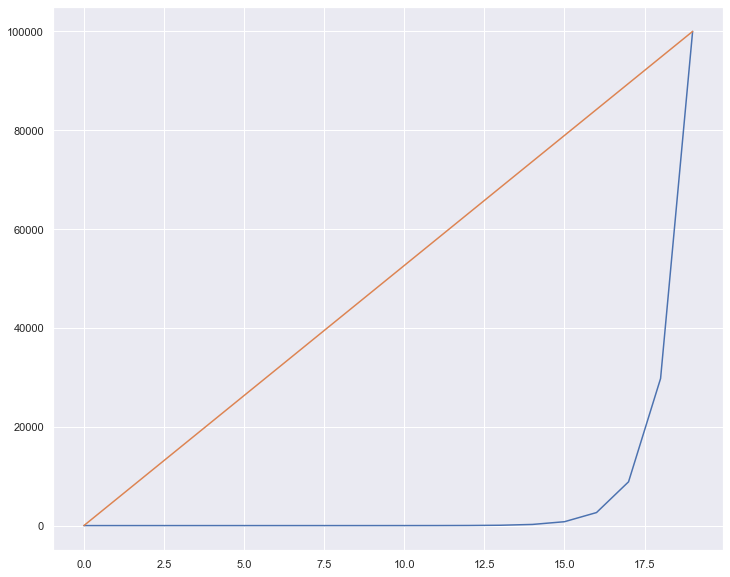

In [25]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [26]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(class_weight='balanced', random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.7334390844419358:
The Logg Loss of C parameter 1e-05 is 0.5787186704492757:

The CA of C parameter 3.359818286283781e-05 is 0.7269237132263495:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5777675653190577:

The CA of C parameter 0.00011288378916846884 is 0.7238728261821579:
The Logg Loss of C parameter 0.00011288378916846884 is 0.5784876287049426:

The CA of C parameter 0.000379269019073225 is 0.746109754080014:
The Logg Loss of C parameter 0.000379269019073225 is 0.5746944592374537:

The CA of C parameter 0.0012742749857031334 is 0.7084529521103186:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5937906862660922:

The CA of C parameter 0.004281332398719391 is 0.7072413558200414:
The Logg Loss of C parameter 0.004281332398719391 is 0.5982358689301521:

The CA of C parameter 0.01438449888287663 is 0.7364705080919062:
The Logg Loss of C parameter 0.01438449888287663 is 0.5787543456341087:

The CA of C parameter 0.04832930238571752 is 

In [27]:
# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,16,2636.650899,0.726564,0.573806
1,3,0.000379,0.746110,0.574694
2,13,69.519280,0.724184,0.577033
3,8,0.162378,0.724875,0.577040
4,10,1.832981,0.725255,0.577054
5,9,0.545559,0.723119,0.577318
6,18,29763.514416,0.724476,0.577323
7,19,100000.000000,0.724530,0.577332
8,15,784.759970,0.724252,0.577461
9,17,8858.667904,0.724359,0.577470


In [28]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.8599706102747258
Log Loss: 4.836443780437051


# Final Model with Selected Parameters and Grid Search

In [29]:
# Final Model 
log_reg3 = LogisticRegression(random_state=10, solver = 'liblinear', C=1e-05)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_test, y_test)

pred_proba_t = log_reg3.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.862277022489952
Log Loss: 0.3551574976566771


In [30]:
from sklearn.model_selection import GridSearchCV

# parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)        

grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.863148009381356